In [1]:
import matplotlib.pyplot as plt
import numpy as np
from clustering.kmesar import *
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_blobs
import pandas as pd

In [2]:
df = pd.read_csv('./datasets/iris.csv')

print(df.head())

   Sepal_Length  Sepal_Width  Petal_Length  Petal_Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [3]:
features = df.columns[2:-1]
X_orig = df[features]

print(f'Features: {features}')

scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_orig), columns=features)

print('Scaled dataset:')
print(X_scaled.head())

Features: Index(['Petal_Length', 'Petal_Width'], dtype='object')
Scaled dataset:
   Petal_Length  Petal_Width
0      0.067797     0.041667
1      0.067797     0.041667
2      0.050847     0.041667
3      0.084746     0.041667
4      0.067797     0.041667


In [4]:
X_scaled_arr = np.array(X_scaled)
print(X_scaled_arr.shape)
print(X_scaled_arr[:5, :])

(150, 2)
[[0.06779661 0.04166667]
 [0.06779661 0.04166667]
 [0.05084746 0.04166667]
 [0.08474576 0.04166667]
 [0.06779661 0.04166667]]


In [16]:
# Ispod sam iscrtao sve na jednoj figuri umesto na dve kao ovde

# k_clusters = [2, 3, 4]
# colors = ['red', 'green', 'blue', 'yellow', 'm', 'plum', 'brown']
# fig1: plt.Figure = plt.figure(figsize=(18, 6))
# fig2: plt.Figure = plt.figure(figsize=(18, 6))
# fig1_subplot_index = 1
# fig2_subplot_index = 1
#
# for k in k_clusters:
#     est = KMESAR(k_clusters=k)
#     est_sklearn = KMeans(n_clusters=k, init='random')
#
#     est.fit(X_scaled)
#     est_sklearn.fit(X_scaled)
#
#     df['label'] = est.labels_
#     df['label_sklearn'] = est_sklearn.labels_
#
#     ax1 = fig1.add_subplot(1, 3, fig1_subplot_index)
#     ax2 = fig2.add_subplot(1, 3, fig2_subplot_index)
#
#     for cluster_label in range(k):
#         cluster_subsample1 = df.loc[df['label'] == cluster_label]
#         cluster_subsample2 = df.loc[df['label_sklearn'] == cluster_label]
#
#         ax1.scatter(cluster_subsample1['Petal_Length'], cluster_subsample1['Petal_Width'],
#                     s=30, c=colors[cluster_label], marker='o', label=f'{cluster_label}')
#         ax2.scatter(cluster_subsample2['Petal_Length'], cluster_subsample2['Petal_Width'],
#                     s=30, c=colors[cluster_label], marker='o', label=f'{cluster_label}')
#         # plt.scatter(cluster_subsample['Petal_Length'], cluster_subsample['Petal_Width'],
#         #             s=30, c=colors[cluster_label], marker='o', label=f'{cluster_label}')
#
#     centroids = pd.DataFrame(scaler.inverse_transform(est.centroids_), columns=features)
#     centroids_sklearn = pd.DataFrame(scaler.inverse_transform(est_sklearn.cluster_centers_), columns=features)
#
#     ax1.scatter(centroids['Petal_Length'], centroids['Petal_Width'], c='black', s=35, marker='x', label='Centroids')
#     ax1.legend(loc='lower right')
#     ax1.set_title(f'K-Means (standard), k_clusters={k}, iters={est.n_iter_}, SSE={est.inertia_ : .3}', fontsize=12)
#
#     ax2.scatter(centroids_sklearn['Petal_Length'], centroids_sklearn['Petal_Width'],
#                 c='black', s=35, marker='x', label='Centroids')
#     ax2.legend(loc='lower right')
#     ax2.set_title(f'K-Means (sklearn), k_clusters={k}, iters={est_sklearn.n_iter_}, SSE={est.inertia_ : .3}', fontsize=12)
#
#     # plt.scatter(centroids['Petal_Length'], centroids['Petal_Width'], c='black', s=35, marker='x', label='Centroids')
#     #
#     # plt.legend(loc='lower right')
#     # plt.title(f'K-Means (moja verzija), k_clusters: {k}, SSE: {est.inertia_ : .3}', fontsize=12)
#
#     fig1_subplot_index += 1
#     fig2_subplot_index += 1
#
# fig1.tight_layout()
# fig2.tight_layout()
#
# plt.show()

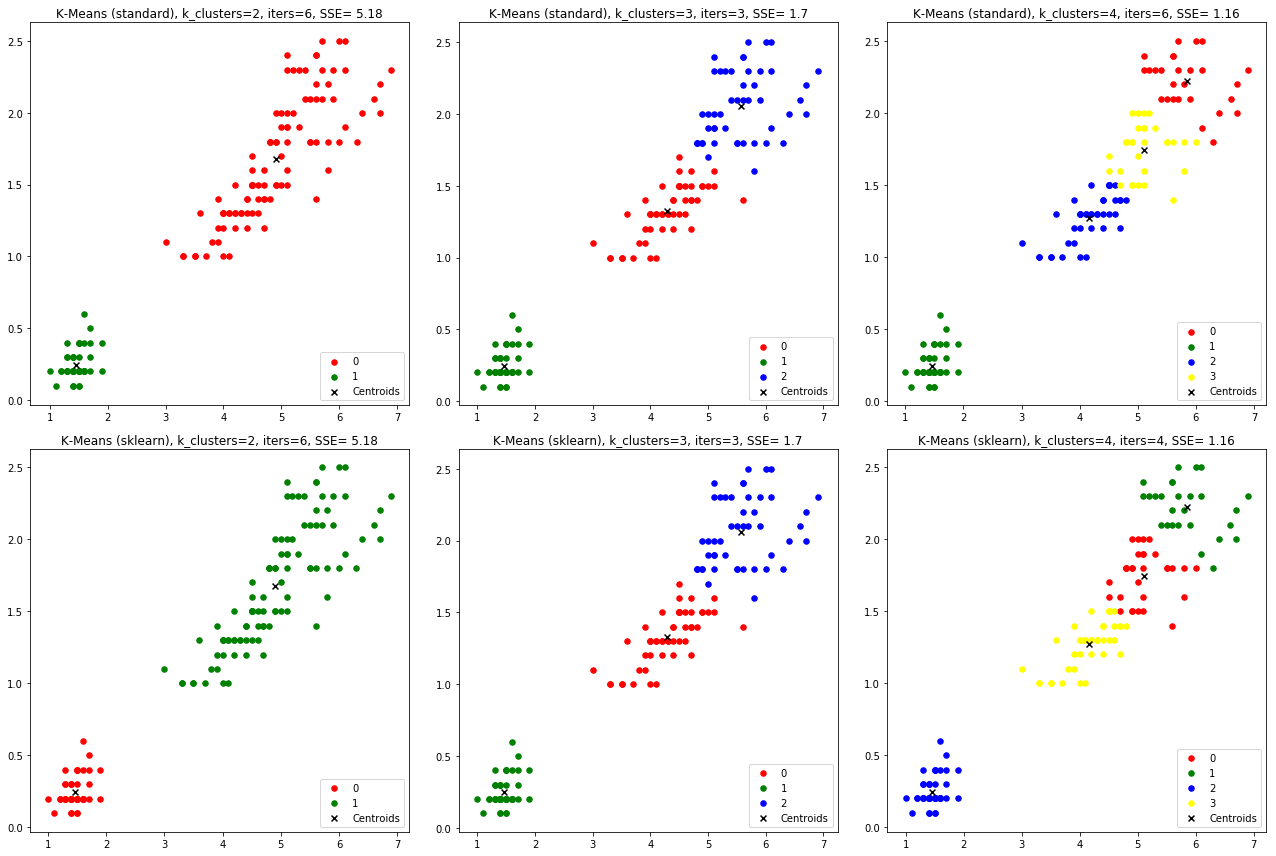

In [15]:
k_clusters = [2, 3, 4]
colors = ['red', 'green', 'blue', 'yellow', 'm', 'plum', 'brown']
fig: plt.Figure = plt.figure(figsize=(18, 12))
axes = fig.subplots(2, 3)
subplot_index = 0

for k in k_clusters:
    est = KMESAR(k_clusters=k)
    est_sklearn = KMeans(n_clusters=k, init='random')

    est.fit(X_scaled)
    est_sklearn.fit(X_scaled)

    df['label'] = est.labels_
    df['label_sklearn'] = est_sklearn.labels_

    for cluster_label in range(k):
        cluster_subsample1 = df.loc[df['label'] == cluster_label]
        cluster_subsample2 = df.loc[df['label_sklearn'] == cluster_label]

        axes[0, subplot_index].scatter(cluster_subsample1['Petal_Length'], cluster_subsample1['Petal_Width'],
                    s=30, c=colors[cluster_label], marker='o', label=f'{cluster_label}')
        axes[1, subplot_index].scatter(cluster_subsample2['Petal_Length'], cluster_subsample2['Petal_Width'],
                    s=30, c=colors[cluster_label], marker='o', label=f'{cluster_label}')
        # plt.scatter(cluster_subsample['Petal_Length'], cluster_subsample['Petal_Width'],
        #             s=30, c=colors[cluster_label], marker='o', label=f'{cluster_label}')

    centroids = pd.DataFrame(scaler.inverse_transform(est.centroids_), columns=features)
    centroids_sklearn = pd.DataFrame(scaler.inverse_transform(est_sklearn.cluster_centers_), columns=features)

    axes[0, subplot_index].scatter(centroids['Petal_Length'], centroids['Petal_Width'],
                                   c='black', s=35, marker='x', label='Centroids')
    axes[0, subplot_index].legend(loc='lower right')
    axes[0, subplot_index].set_title(f'K-Means (standard), k_clusters={k}, iters={est.n_iter_}, '
                                     f'SSE={est.inertia_ : .3}', fontsize=12)

    axes[1, subplot_index].scatter(centroids_sklearn['Petal_Length'], centroids_sklearn['Petal_Width'],
                c='black', s=35, marker='x', label='Centroids')
    axes[1, subplot_index].legend(loc='lower right')
    axes[1, subplot_index].set_title(f'K-Means (sklearn), k_clusters={k}, iters={est_sklearn.n_iter_}, '
                                     f'SSE={est.inertia_ : .3}', fontsize=12)

    subplot_index += 1

fig.tight_layout()
plt.show()

fig.savefig('Standard K-Means comparison [iris]')